In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import glob



# Ruta a tu carpeta
ruta = "/content/drive/MyDrive/DatosBikesharing2022_2024/"

# Obtener todos los CSV de la carpeta
archivos = glob.glob(ruta + "*.csv")

# Leer y combinar todos los archivos
df_list = [pd.read_csv(archivo) for archivo in archivos]
df = pd.concat(df_list, ignore_index=True)

# Mostrar resultados básicos
print(f"Número de archivos cargados: {len(archivos)}")
print(f"Cantidad total de registros: {len(df)}")
print("Columnas disponibles:")
print(df.columns)

# Vista previa
df.head()


Número de archivos cargados: 36
Cantidad total de registros: 14058439
Columnas disponibles:
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,38.901385,-76.941877,casual
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,38.887403,-77.176992,member


In [3]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

LIMPIEZA DE DATOS

In [4]:
#Convertir columnas de fecha a tipo datetime
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')


In [5]:
#Calcular la duración del viaje en minutos
df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


In [6]:
#Eliminar registros no válidos (menos de 1 minuto o fechas faltantes)
df = df[
    (df['duration_min'] >= 1) &
    df['started_at'].notnull() &
    df['ended_at'].notnull()
]


In [7]:
#Verificacion de limpieza
print(f"Registros después de limpieza: {len(df)}")
print(f"Duración promedio: {df['duration_min'].mean():.2f} minutos")


Registros después de limpieza: 9769213
Duración promedio: 21.44 minutos


In [8]:
# Crear columna con el año del viaje
df['year'] = df['started_at'].dt.year  # Ej: 2022

# Crear columna con el número de mes
df['month'] = df['started_at'].dt.month  # Ej: 1 para enero

# Crear columna con el nombre del día de la semana
df['day_of_week'] = df['started_at'].dt.day_name()  # Ej: 'Monday'

# Crear columna con la hora de inicio del viaje
df['hour'] = df['started_at'].dt.hour  # Ej: 14 para las 2 PM

# Crear columna con la estación del año (hemisferio norte)
def obtener_estacion(mes):
    if mes in [12, 1, 2]:
        return 'Invierno'
    elif mes in [3, 4, 5]:
        return 'Primavera'
    elif mes in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

df['season'] = df['month'].apply(obtener_estacion)


In [9]:
# Ver las primeras filas con las nuevas variables
df[['started_at', 'year', 'month', 'day_of_week', 'hour', 'season']].head()


,started_at,year,month,day_of_week,hour,season
0,2022-01-06 18:39:28,2022,1,Thursday,18,Invierno
1,2022-01-31 19:21:22,2022,1,Monday,19,Invierno
2,2022-01-07 15:28:39,2022,1,Friday,15,Invierno
3,2022-01-27 20:09:25,2022,1,Thursday,20,Invierno
4,2022-01-07 16:14:28,2022,1,Friday,16,Invierno


UN POCO DE ANALISIS DE LOS DATOS, PAAR VER CIERTOS COMPORTAMIENTOS

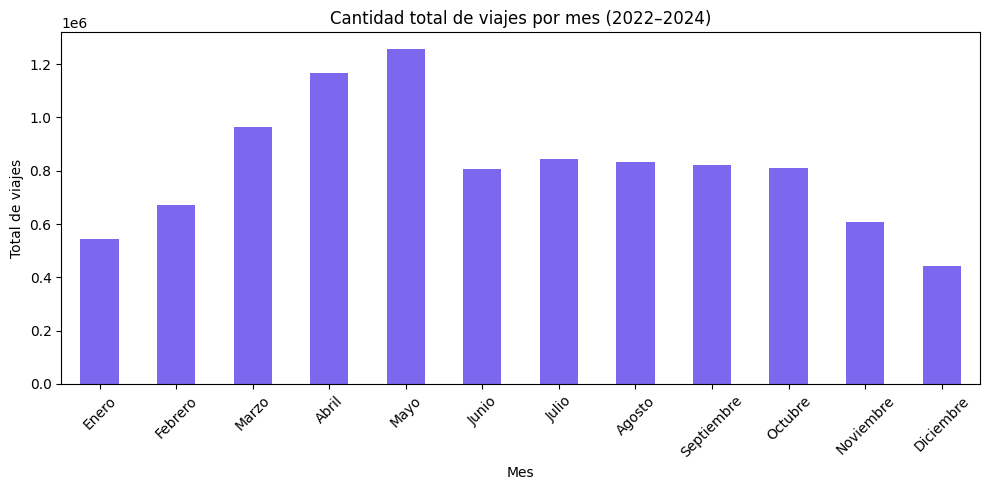

In [10]:
import matplotlib.pyplot as plt

# Agrupar solo por número de mes, sumando viajes de todos los años
viajes_por_mes_total = df.groupby('month')['ride_id'].count()

# Crear nombres de meses en español (si prefieres)
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Gráfico de barras
plt.figure(figsize=(10,5))
viajes_por_mes_total.plot(kind='bar', color='mediumslateblue')
plt.title("Cantidad total de viajes por mes (2022–2024)")
plt.xlabel("Mes")
plt.ylabel("Total de viajes")
plt.xticks(ticks=range(12), labels=nombres_meses, rotation=45)
plt.tight_layout()
plt.show()



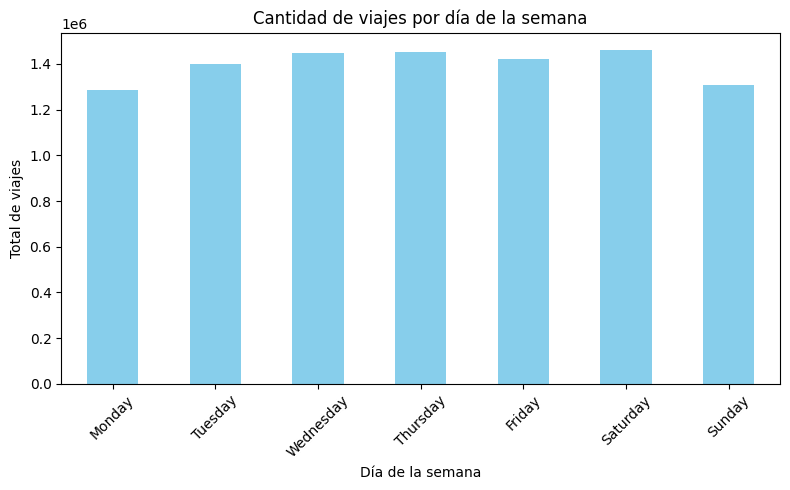

In [11]:
# Contar viajes por día de la semana en orden lógico
dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
viajes_por_dia = df['day_of_week'].value_counts().reindex(dias)

# Gráfico de barras
plt.figure(figsize=(8,5))
viajes_por_dia.plot(kind='bar', color='skyblue')
plt.title("Cantidad de viajes por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Total de viajes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


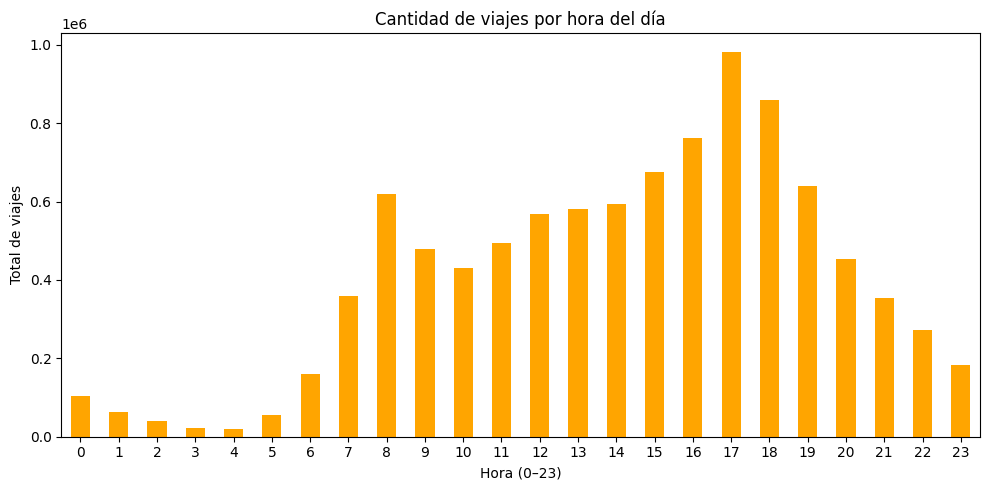

In [12]:
# Contar viajes por hora
viajes_por_hora = df['hour'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(10,5))
viajes_por_hora.plot(kind='bar', color='orange')
plt.title("Cantidad de viajes por hora del día")
plt.xlabel("Hora (0–23)")
plt.ylabel("Total de viajes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


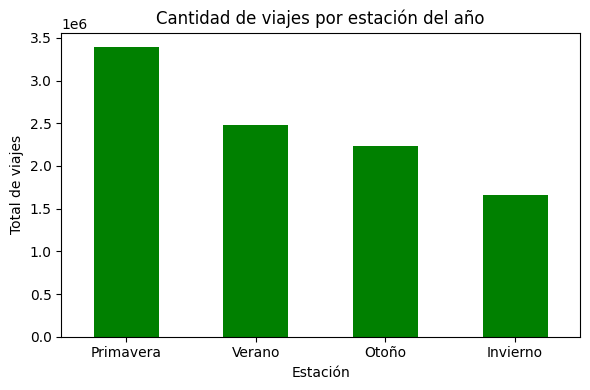

In [13]:
# Contar viajes por estación
viajes_por_estacion = df['season'].value_counts().reindex(['Primavera', 'Verano', 'Otoño', 'Invierno'])

# Gráfico de barras
plt.figure(figsize=(6,4))
viajes_por_estacion.plot(kind='bar', color='green')
plt.title("Cantidad de viajes por estación del año")
plt.xlabel("Estación")
plt.ylabel("Total de viajes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


CARGAMOS UN DATASET DEL CLIMA DE WASHINGTON DC

In [14]:


# Cargar el archivo de clima desde Google Drive
df_clima = pd.read_csv("/content/drive/MyDrive/DatosClima_WAS/dc_weather.csv", parse_dates=['datetime'])

# Ver las primeras filas para conocer su estructura
df_clima.head()


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Washington,DC,USA",2015-08-01,33.1,22.8,28.2,34.0,22.8,28.6,17.4,53.3,...,22.9,8,NaN,2015-08-01T06:08:52,2015-08-01T20:19:30,0.54,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KIAD,KDCA,72405013743,72403793728,72403093738,..."
1,"Washington,DC,USA",2015-08-02,32.0,22.8,27.3,31.1,22.8,27.2,15.4,49.1,...,22.4,8,NaN,2015-08-02T06:09:44,2015-08-02T20:18:29,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KIAD,KDCA,72405013743,72403793728,72403093738,..."
2,"Washington,DC,USA",2015-08-03,33.2,21.8,27.9,34.9,21.8,28.7,18.6,58.7,...,24.1,9,NaN,2015-08-03T06:10:38,2015-08-03T20:17:26,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."
3,"Washington,DC,USA",2015-08-04,35.3,24.9,29.3,36.6,24.9,30.4,19.0,55.2,...,21.9,9,NaN,2015-08-04T06:11:31,2015-08-04T20:16:22,0.65,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."
4,"Washington,DC,USA",2015-08-05,33.6,24.0,28.6,33.0,24.0,28.6,17.6,55.3,...,23.7,9,NaN,2015-08-05T06:12:24,2015-08-05T20:15:16,0.68,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KDCA,72405013743,72403793728,KGAI,KADW,KDAA,72..."


In [15]:
# Revisar nombres de columnas y tipos de datos
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3319 entries, 0 to 3318
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              3319 non-null   object        
 1   datetime          3319 non-null   datetime64[ns]
 2   tempmax           3319 non-null   float64       
 3   tempmin           3319 non-null   float64       
 4   temp              3319 non-null   float64       
 5   feelslikemax      3319 non-null   float64       
 6   feelslikemin      3319 non-null   float64       
 7   feelslike         3319 non-null   float64       
 8   dew               3319 non-null   float64       
 9   humidity          3319 non-null   float64       
 10  precip            3319 non-null   float64       
 11  precipprob        3319 non-null   int64         
 12  precipcover       3319 non-null   float64       
 13  preciptype        1530 non-null   object        
 14  snow              3319 n

In [16]:
# Filtrar solo los años 2022, 2023 y 2024
df_clima = df_clima[(df_clima['datetime'].dt.year >= 2022) &
                    (df_clima['datetime'].dt.year <= 2024)]

# Crear columna 'date' sin hora (formato date)
df_clima['date'] = df_clima['datetime'].dt.date

# Ver columnas clave para revisar
df_clima[['date', 'temp', 'precip', 'humidity', 'windspeed', 'cloudcover', 'conditions']].head()


,date,temp,precip,humidity,windspeed,cloudcover,conditions
2345,2022-01-01,14.6,11.400,92.1,18.4,99.5,"Rain, Overcast"
2346,2022-01-02,14.2,3.132,81.6,30.4,91.6,"Rain, Overcast"
2347,2022-01-03,0.4,22.563,78.7,36.2,77.2,"Snow, Rain, Partially cloudy"
2348,2022-01-04,-1.5,0.000,65.7,22.7,18.7,Clear
2349,2022-01-05,2.1,0.011,76.3,21.9,82.6,"Rain, Partially cloudy"


In [17]:
# Elegimos solo las columnas que queremos mantener
df_clima_simple = df_clima[['date', 'temp', 'precip', 'humidity', 'windspeed', 'conditions']]


In [18]:
# Crear la columna 'date' a partir de la fecha de inicio del viaje
df['date'] = df['started_at'].dt.date


In [19]:
# Agrupar por fecha y contar la cantidad de viajes
df_bicis_dia = df.groupby('date').size().reset_index(name='cantidad_viajes')

# Mostrar las primeras filas
df_bicis_dia.head()


,date,cantidad_viajes
0,2022-01-01,3397
1,2022-01-02,5332
2,2022-01-03,482
3,2022-01-04,1238
4,2022-01-05,2237


In [20]:
# Unir datos de bicicletas y clima usando la columna 'date'
df_completo = pd.merge(df_bicis_dia, df_clima_simple, on='date', how='left')


In [21]:
# Ver algunas filas del dataset combinado
df_completo.head()

# Revisar si hay valores climáticos faltantes
df_completo.isnull().sum()


,0
date,0
cantidad_viajes,0
temp,0
precip,0
humidity,0
windspeed,0
conditions,0


GRAFICAS DE NUESTROS DATASETS CORRELACIONADOS

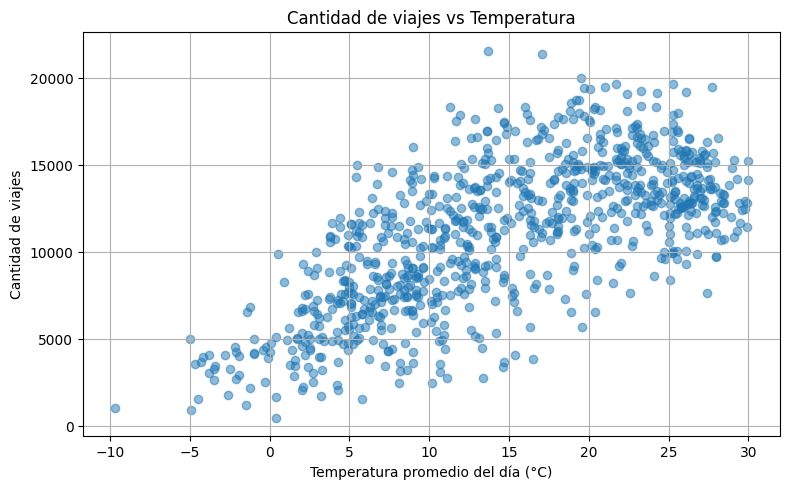

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df_completo['temp'], df_completo['cantidad_viajes'], alpha=0.5)
plt.title("Cantidad de viajes vs Temperatura")
plt.xlabel("Temperatura promedio del día (°C)")
plt.ylabel("Cantidad de viajes")
plt.grid(True)
plt.tight_layout()
plt.show()


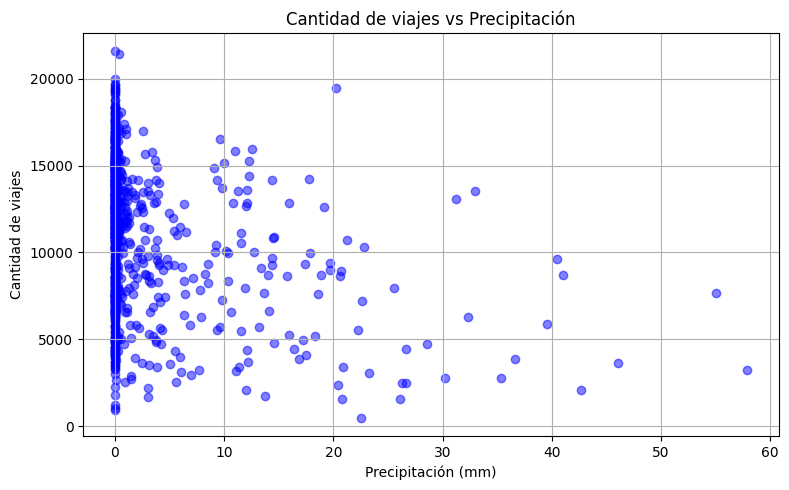

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(df_completo['precip'], df_completo['cantidad_viajes'], alpha=0.5, color='blue')
plt.title("Cantidad de viajes vs Precipitación")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Cantidad de viajes")
plt.grid(True)
plt.tight_layout()
plt.show()


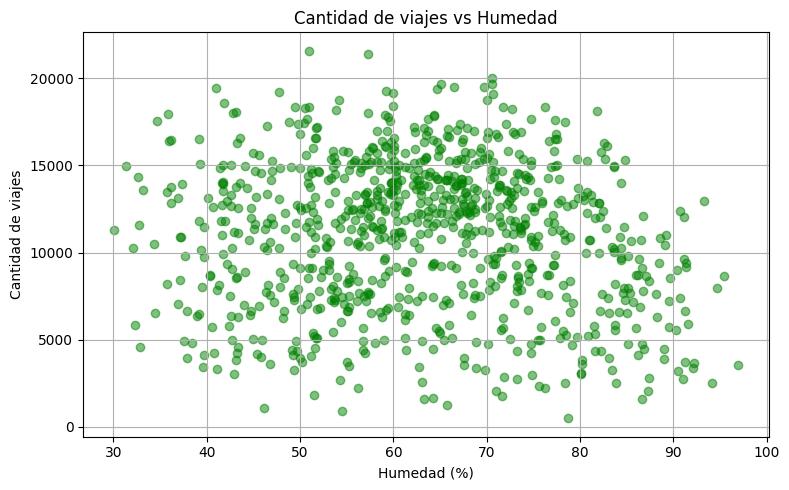

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(df_completo['humidity'], df_completo['cantidad_viajes'], alpha=0.5, color='green')
plt.title("Cantidad de viajes vs Humedad")
plt.xlabel("Humedad (%)")
plt.ylabel("Cantidad de viajes")
plt.grid(True)
plt.tight_layout()
plt.show()


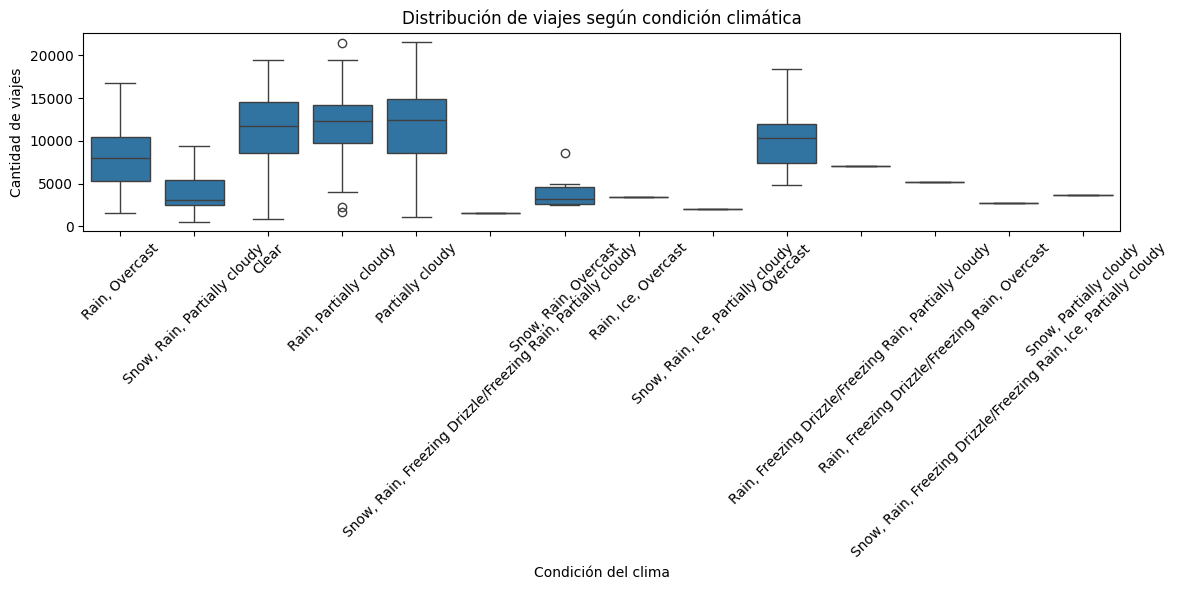

In [25]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df_completo, x='conditions', y='cantidad_viajes')
plt.title("Distribución de viajes según condición climática")
plt.xlabel("Condición del clima")
plt.ylabel("Cantidad de viajes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


GRAFICO DE ARRIBA PERO LIMPIANDO UN POCO DE CONDICIONES PARA QUE SEA MAS CLARO

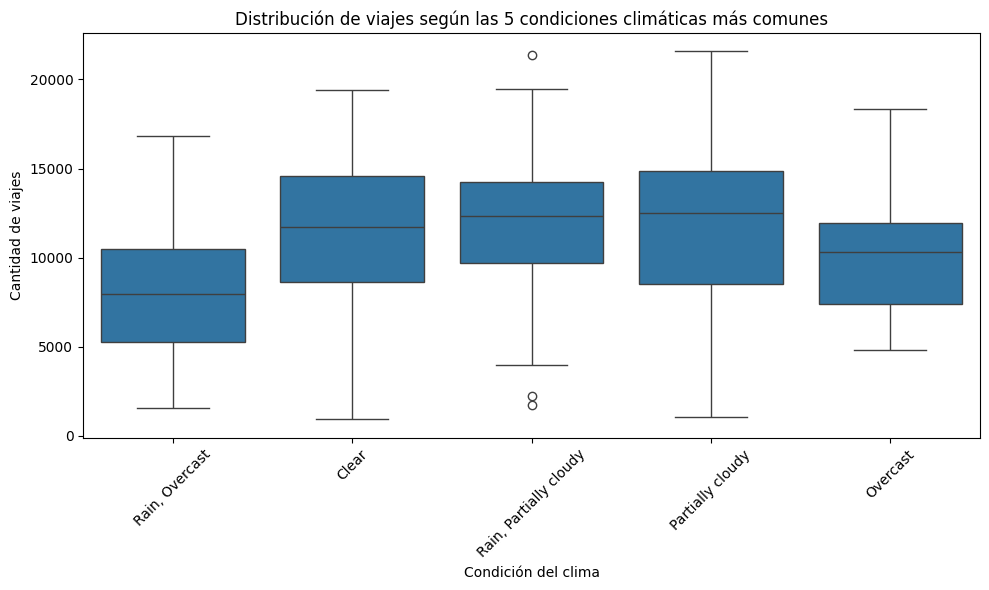

In [26]:
# Contar cuántas veces aparece cada condición climática
top_condiciones = df_completo['conditions'].value_counts().nlargest(5).index

# Filtrar el DataFrame para quedarnos solo con esas 5 condiciones
df_top = df_completo[df_completo['conditions'].isin(top_condiciones)]

# Boxplot con solo esas 5 condiciones
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df_top, x='conditions', y='cantidad_viajes')
plt.title("Distribución de viajes según las 5 condiciones climáticas más comunes")
plt.xlabel("Condición del clima")
plt.ylabel("Cantidad de viajes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


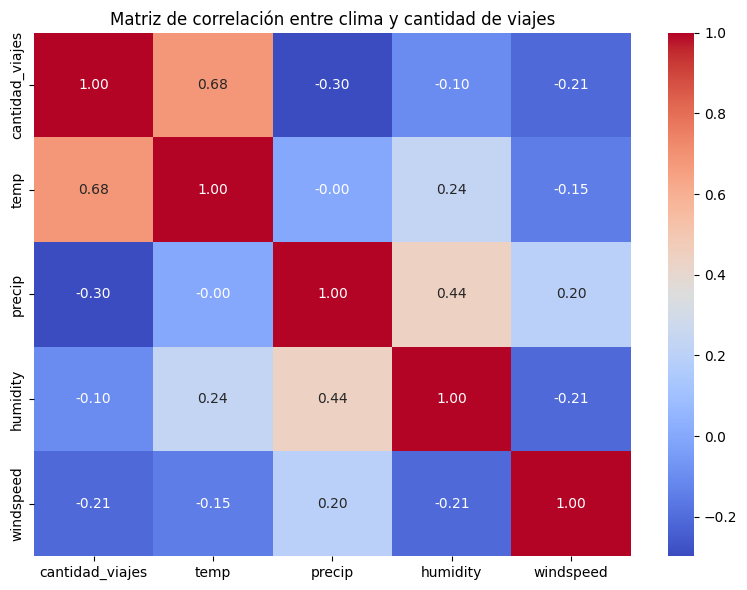

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas relevantes
variables_numericas = df_completo[['cantidad_viajes', 'temp', 'precip', 'humidity', 'windspeed']]

# Calcular la matriz de correlación
matriz_corr = variables_numericas.corr()

# Mostrar heatmap
plt.figure(figsize=(8,6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre clima y cantidad de viajes")
plt.tight_layout()
plt.show()


ENTRENAMIENTO

In [28]:
# Crear una copia del DataFrame para modelar
df_modelo = df_completo[['cantidad_viajes', 'temp', 'precip', 'humidity', 'windspeed', 'conditions']].copy()

# Convertir 'conditions' en variables dummy (one-hot)
df_modelo = pd.get_dummies(df_modelo, columns=['conditions'], drop_first=True)


In [29]:
# Variable objetivo (lo que queremos predecir)
y = df_modelo['cantidad_viajes']

# Variables predictoras (las que usamos para predecir)
X = df_modelo.drop(columns='cantidad_viajes')


In [30]:
from sklearn.model_selection import train_test_split

# 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)


LinearRegression()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predecir con los datos de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE (error absoluto medio): {mae:.2f}")
print(f"RMSE (raíz error cuadrático medio): {rmse:.2f}")
print(f"R² (coeficiente de determinación): {r2:.2f}")


MAE (error absoluto medio): 2253.86
RMSE (raíz error cuadrático medio): 2692.85
R² (coeficiente de determinación): 0.59


In [33]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Predecir con datos de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar rendimiento
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Mostrar métricas
print(f"Random Forest - MAE: {mae_rf:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}")
print(f"Random Forest - R²: {r2_rf:.2f}")


Random Forest - MAE: 2115.57
Random Forest - RMSE: 2607.00
Random Forest - R²: 0.62


INTERFAZ

In [46]:
# Obtener las 5 condiciones climáticas más frecuentes
top5_conditions = df_completo['conditions'].value_counts().nlargest(5).index.tolist()

# Crear lista de columnas dummy que fueron usadas por el modelo
condiciones_dummy = [col for col in X.columns if col.startswith("conditions_")]

# Función para predecir arriendos según entrada del usuario
def predecir_viajes(temp, precip, humidity, windspeed, condition):
    # Crear entrada con valores numéricos
    entrada = {
        'temp': temp,
        'precip': precip,
        'humidity': humidity,
        'windspeed': windspeed,
    }

    # Iniciar todas las condiciones en 0
    for cond in condiciones_dummy:
        entrada[cond] = 0

    # Activar la columna correspondiente a la condición seleccionada, si existe
    columna_activa = f'conditions_{condition}'
    if columna_activa in entrada:
        entrada[columna_activa] = 1

    # Convertir en DataFrame e inferir predicción
    entrada_df = pd.DataFrame([entrada])
    pred = modelo_rf.predict(entrada_df)[0]
    return f" Se estiman aproximadamente {int(pred):,} viajes de bicicleta ese día."

# Crear interfaz Gradio con valores restringidos a rangos realistas
import gradio as gr

##interfaz = gr.Interface(
    #fn=predecir_viajes,
    #inputs=[
        #gr.Number(label="Temperatura promedio (°C)", value=20, minimum=-10, maximum=45),
        #gr.Number(label="Precipitación (mm)", value=0, minimum=0, maximum=100),
        #gr.Number(label="Humedad relativa (%)", value=60, minimum=0, maximum=100),
        #gr.Number(label="Velocidad del viento (km/h)", value=10, minimum=0, maximum=100),
        #gr.Dropdown(choices=top5_conditions, label="Condición del clima")
    #],
    #outputs=gr.Textbox(label="Predicción"),
    #title="Predicción de arriendos de bicicletas según clima 🌦️🚲",
    #description="Ingresa valores realistas para el clima y obtén una predicción estimada del número de viajes diarios."
#)

# Lanzar interfaz
##interfaz.launch()



INTERFAZ PARA VER CUANTOS VIAJES SE REALIZARON EN UN DIA CUALQUIERA(2022-2024)

In [35]:
# Crear columna del mes si no existe
df_completo['month'] = pd.to_datetime(df_completo['date']).dt.month

# Calcular clima promedio mensual
clima_promedio_mensual = df_completo.groupby('month').agg({
    'temp': 'mean',
    'precip': 'mean',
    'humidity': 'mean',
    'windspeed': 'mean',
    'conditions': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Clear'
}).reset_index()

clima_promedio_mensual = clima_promedio_mensual.round(2)
clima_promedio_mensual


,month,temp,precip,humidity,windspeed,conditions
0,1,4.13,2.89,63.70,25.37,Partially cloudy
1,2,6.66,1.65,58.58,25.74,Partially cloudy
2,3,9.92,2.36,56.51,28.22,Partially cloudy
3,4,15.17,2.32,56.98,26.62,Partially cloudy
4,5,19.34,2.86,66.65,22.31,Partially cloudy
5,6,23.60,1.96,60.76,23.62,Partially cloudy
6,7,26.91,4.53,68.10,22.05,"Rain, Partially cloudy"
7,8,25.84,2.04,67.31,22.85,Partially cloudy
8,9,22.30,2.23,67.16,21.76,Partially cloudy
9,10,15.43,1.43,68.64,21.80,Partially cloudy


In [47]:
import pandas as pd
import gradio as gr

# Asegurarse de tener esta variable definida (una sola vez en el notebook)
columnas_esperadas = modelo_rf.feature_names_in_

# Función para predecir en base a una fecha futura
def predecir_por_fecha(fecha_input):
    try:
        fecha = pd.to_datetime(fecha_input).date()
        dia = fecha.day
        mes = fecha.month

        # Filtrar el clima para el mismo día y mes en los años 2022-2024
        filtro = (df_clima['datetime'].dt.day == dia) & (df_clima['datetime'].dt.month == mes)
        datos_dia = df_clima[filtro]

        if datos_dia.empty:
            return " No hay suficientes datos históricos para esta fecha."

        # Calcular el clima promedio del día en años anteriores
        temp = datos_dia['temp'].mean()
        precip = datos_dia['precip'].mean()
        humidity = datos_dia['humidity'].mean()
        windspeed = datos_dia['windspeed'].mean()

        # Condición climática más común ese día
        condicion_mas_comun = datos_dia['conditions'].mode()[0]

        # Armar entrada al modelo
        entrada = {
            'temp': temp,
            'precip': precip,
            'humidity': humidity,
            'windspeed': windspeed,
        }

        # Iniciar todas las condiciones en 0
        for cond in condiciones_dummy:
            entrada[cond] = 0

        # Activar la columna correspondiente a la condición si existe
        columna_activa = f"conditions_{condicion_mas_comun}"
        if columna_activa in condiciones_dummy:
            entrada[columna_activa] = 1

        entrada_df = pd.DataFrame([entrada])
        prediccion = modelo_rf.predict(entrada_df)[0]

        return f" Se estiman aproximadamente {int(prediccion):,} viajes de bicicleta el {fecha.strftime('%d-%m-%Y')}."

    except Exception as e:
        return f" Error: {str(e)}"



# Crear interfaz Gradio
#interfaz_futura = gr.Interface(
    #fn=predecir_por_fecha,
    #inputs=gr.Textbox(label="Ingresa una fecha futura (formato: AAAA-MM-DD)"),
    #outputs=gr.Textbox(label="Predicción"),
    #title="Predicción de arriendos por fecha futura 🗓️🚴‍♀️",
    #description="Escribe una fecha a partir del año 2025. Se usará el clima promedio mensual para estimar la cantidad de viajes."
#)

# Lanzar interfaz
#interfaz_futura.launch()


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr

# Asegúrate de tener cargado tu DataFrame de viajes como `df`
# Y que la columna 'started_at' esté en formato datetime

# Función para consultar viajes por hora en una fecha específica
def viajes_por_hora(fecha_str):
    try:
        # Convertir texto a fecha
        fecha = pd.to_datetime(fecha_str).date()
    except:
        return " Formato inválido. Usa el formato AAAA-MM-DD.", None

    # Validar rango permitido
    if not (pd.to_datetime("2022-01-01").date() <= fecha <= pd.to_datetime("2024-12-31").date()):
        return " Solo se permiten fechas entre 2022 y 2024.", None

    # Filtrar viajes del día seleccionado
    viajes_dia = df[df['started_at'].dt.date == fecha]

    if viajes_dia.empty:
        return f" No se registraron viajes el {fecha}.", None

    # Extraer hora y contar viajes por hora
    viajes_dia['hora'] = viajes_dia['started_at'].dt.hour
    conteo_por_hora = viajes_dia['hora'].value_counts().sort_index()

    # Asegurar que todas las horas de 0 a 23 estén representadas
    todas_las_horas = pd.Series(0, index=range(24))
    conteo_por_hora = todas_las_horas.add(conteo_por_hora, fill_value=0)

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.bar(conteo_por_hora.index, conteo_por_hora.values, color='skyblue')
    ax.set_xticks(range(24))
    ax.set_xlabel("Hora del día")
    ax.set_ylabel("Viajes registrados")
    ax.set_title(f"Distribución de viajes por hora - {fecha}")
    plt.tight_layout()

    total_viajes = viajes_dia.shape[0]
    mensaje = f" El {fecha} se registraron {total_viajes:,} viajes de bicicleta.\nAquí tienes la distribución por hora:"
    return mensaje, fig

# Interfaz con Gradio
#interfaz_historica_horas = gr.Interface(
    #fn=viajes_por_hora,
    #inputs=gr.Textbox(label="Ingresa una fecha (formato: AAAA-MM-DD) entre 2022 y 2024"),
    #outputs=[
        #gr.Textbox(label="Resumen del día"),
        #gr.Plot(label="Distribución horaria de viajes")
    #],
    #title="Consulta de viajes por hora en un día específico 🚴‍♂️🕒",
    #description="Obtén la cantidad total de viajes en un día entre 2022 y 2024, junto con la distribución por hora."
#)

#interfaz_historica_horas.launch()


In [49]:
import gradio as gr

with gr.Blocks() as app:
    gr.Markdown("#  Sistema de Predicción y Consulta de Arriendos de Bicicletas")
    gr.Markdown("Selecciona una pestaña para usar una de las herramientas disponibles:")

    # 1. Predicción por condiciones climáticas
    with gr.Tab("🌤️ Predicción por clima manual"):
        gr.Markdown("### Ingresa las condiciones climáticas del día:")
        temp = gr.Slider(minimum=-10, maximum=45, label="Temperatura (°C)", value=20)
        precip = gr.Slider(minimum=0, maximum=100, label="Precipitación (mm)", value=0)
        humidity = gr.Slider(minimum=0, maximum=100, label="Humedad (%)", value=60)
        windspeed = gr.Slider(minimum=0, maximum=100, label="Velocidad del viento (km/h)", value=10)
        condition = gr.Dropdown(choices=top5_conditions, label="Condición climática")
        salida_pred_clima = gr.Textbox(label="Predicción")

        btn_pred_clima = gr.Button("Predecir")
        btn_pred_clima.click(fn=predecir_viajes,
                             inputs=[temp, precip, humidity, windspeed, condition],
                             outputs=salida_pred_clima)

    # 2. Predicción por fecha futura
    with gr.Tab("📅 Predicción por fecha futura"):
        gr.Markdown("### Ingresa una fecha desde 2025 en adelante:")
        fecha_futura = gr.Textbox(label="Fecha (AAAA-MM-DD)")
        salida_pred_fecha = gr.Textbox(label="Predicción")

        btn_pred_fecha = gr.Button("Predecir")
        btn_pred_fecha.click(fn=predecir_por_fecha,
                             inputs=fecha_futura,
                             outputs=salida_pred_fecha)

    # 3. Consulta real con gráfico horario
    with gr.Tab("📊 Consulta horaria de un día real (2022–2024)"):
        gr.Markdown("### Ingresa una fecha real para ver viajes por hora:")
        fecha_real = gr.Textbox(label="Fecha (AAAA-MM-DD)")
        resumen = gr.Textbox(label="Resumen del día")
        grafico = gr.Plot(label="Distribución de viajes por hora")

        btn_buscar_hora = gr.Button("Consultar")
        btn_buscar_hora.click(fn=viajes_por_hora,
                              inputs=fecha_real,
                              outputs=[resumen, grafico])
    # 4. Consulta del clima histórico por fecha
    with gr.Tab("🌦️ Consulta del clima histórico (2022–2024)"):
        gr.Markdown("### Ingresa una fecha para conocer las condiciones climáticas registradas:")
        fecha_clima = gr.Textbox(label="Fecha (AAAA-MM-DD)")
        salida_clima = gr.Textbox(label="Resumen del clima")

        btn_clima = gr.Button("Consultar clima")

        def consultar_clima(fecha):
            try:
                fecha = pd.to_datetime(fecha).date()
                fila = df_clima[df_clima['datetime'].dt.date == fecha]
                if fila.empty:
                    return " No hay datos de clima registrados para esa fecha."
                fila = fila.iloc[0]
                resumen = (
                    f" Fecha: {fecha}\n"
                    f" Temperatura promedio: {fila['temp']}°C\n"
                    f" Humedad: {fila['humidity']}%\n"
                    f" Precipitación: {fila['precip']} mm\n"
                    f" Viento: {fila['windspeed']} km/h\n"
                    f" Condición: {fila['conditions']}"
                )
                return resumen
            except Exception as e:
                return f"⚠️ Error: {str(e)}"

        btn_clima.click(fn=consultar_clima,
                        inputs=fecha_clima,
                        outputs=salida_clima)


# Lanzar app principal
app.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7bcdd18dd27e96f842.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [39]:
df['date'] = df['started_at'].dt.date
print(df['date'].max())


2024-05-31
